In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
def apply_svd(image_file, output_folder, sv_num_list):
    # Load the image
    img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

    # Create an output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Perform SVD and visualize progressively reconstructed images
    explained_variances = []

    for sv_num in sv_num_list:
        reconstructed_img, explained_variance = svd_reconstruction(img, sv_num)
        explained_variances.append(explained_variance)

        # Save the reconstructed image
        output_path = os.path.join(output_folder, f'reconstructed_svd_{sv_num}.jpg')
        cv2.imwrite(output_path, reconstructed_img)

    # Plot explained variance
    plot_explained_variance(sv_num_list, explained_variances, output_folder)

In [9]:
def svd_reconstruction(image, sv_num):
    u, s, v = np.linalg.svd(image, full_matrices=False)
    s[sv_num:] = 0  # Keep only the first 'sv_num' singular values
    reconstructed_img = np.dot(u, np.dot(np.diag(s), v))
    explained_variance = np.sum(s**2) / np.sum(np.linalg.svd(image, compute_uv=False)**2)
    return np.uint8(reconstructed_img), explained_variance

In [10]:
def plot_explained_variance(sv_num_list, explained_variances, output_folder):
    plt.figure(figsize=(8, 6))
    plt.plot(sv_num_list, explained_variances, marker='o')
    plt.title('Explained Variance vs. Number of Singular Values')
    plt.xlabel('Number of Singular Values')
    plt.ylabel('Explained Variance')
    plt.grid(True)
    plt.savefig(os.path.join(output_folder, 'explained_variance_plot.png'))
    plt.show()

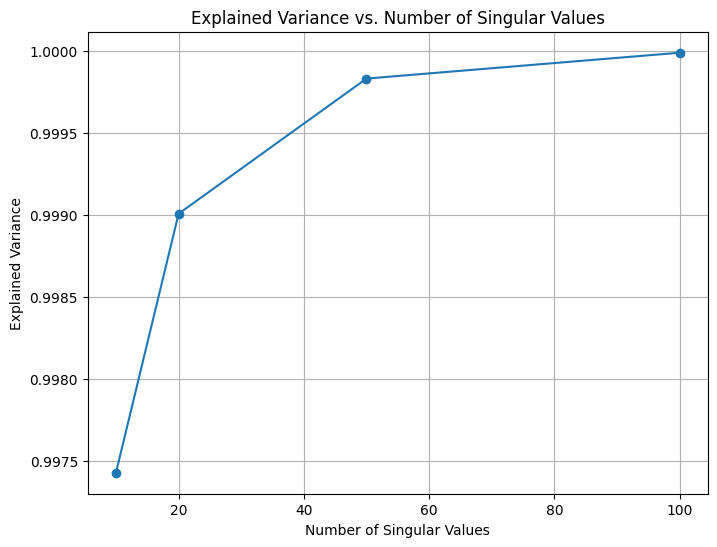

In [11]:
# Example usage
image_file = '/Users/cesaraugustosaenzjimenez/Desktop/Entrega1/Punto 4/Image/Fotoperfil_b&n.jpg'
output_folder = '/Users/cesaraugustosaenzjimenez/Desktop/Entrega1/Punto 4/Image/Result/'
sv_num_list = [10, 20, 50, 100]  # Adjust as needed

apply_svd(image_file, output_folder, sv_num_list)